<a href="https://colab.research.google.com/github/kluless13/deep-c/blob/main/clubbing_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Apr  9 07:58:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip -q install ultralytics==8.0.20

from IPython import display
display.clear_output()
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 29.4/201.2 GB disk)


In [3]:
import os
HOME = os.getcwd()
print(HOME)
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("parvej-hosen").project("cuttle_fish")
version = project.version(1)
dataset = version.download("yolov8")

/content
/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successf

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Cuttle_fish-1 in yolov8:: 100%|██████████| 4628/4628 [00:01<00:00, 4553.48it/s]


In [6]:
import os
HOME = os.getcwd()
print(HOME)
!mkdir {HOME}/datasets
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("jai-wpa2a").project("crab-detection-8oljw")
version = project.version(9)
dataset = version.download("yolov8")

/content
mkdir: cannot create directory ‘/content/datasets’: File exists
mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Crab-Detection-9 in yolov8:: 100%|██████████| 7802/7802 [00:01<00:00, 6387.87it/s]


In [7]:
%mkdir -p {HOME}/data/train/images {HOME}/data/train/labels {HOME}/data/valid/images {HOME}/data/valid/labels {HOME}/data/test/images {HOME}/data/test/labels

In [ ]:
%cp /content/datasets/Crab-Detection-9/test/images/* /content/data/test/images
%cp /content/datasets/Crab-Detection-9/test/labels/* /content/data/test/labels

%cp /content/datasets/Crab-Detection-9/train/images/* /content/data/train/images
%cp /content/datasets/Crab-Detection-9/train/labels/* /content/data/train/labels

%cp /content/datasets/Crab-Detection-9/valid/images/* /content/data/valid/images
%cp /content/datasets/Crab-Detection-9/valid/labels/* /content/data/valid/labels

%cp /content/datasets/Cuttle_fish-1/test/images/* /content/data/test/images
%cp /content/datasets/Cuttle_fish-1/test/labels/* /content/data/test/labels

%cp /content/datasets/Cuttle_fish-1/train/images/* /content/data/train/images
%cp /content/datasets/Cuttle_fish-1/train/labels/* /content/data/train/labels

%cp /content/datasets/Cuttle_fish-1/valid/images/* /content/data/valid/images
%cp /content/datasets/Cuttle_fish-1/valid/labels/* /content/data/valid/labels

# or

In [9]:
import os
import shutil

# Define the source and destination directories
datasets = ['/content/datasets/Crab-Detection-9', '/content/datasets/Cuttle_fish-1']
data_types = ['test', 'train', 'valid']

# Loop through each dataset and data type to copy images and labels
for dataset in datasets:
    for data_type in data_types:
        # Define source and destination paths for images and labels
        src_images = os.path.join(dataset, data_type, 'images')
        dest_images = os.path.join('/content/data', data_type, 'images')
        src_labels = os.path.join(dataset, data_type, 'labels')
        dest_labels = os.path.join('/content/data', data_type, 'labels')

        # Check if source directories exist before copying
        if os.path.exists(src_images) and os.path.exists(src_labels):
            # Create destination directories if they don't exist
            os.makedirs(dest_images, exist_ok=True)
            os.makedirs(dest_labels, exist_ok=True)

            # Copy images
            for item in os.listdir(src_images):
                shutil.copy(os.path.join(src_images, item), dest_images)

            # Copy labels
            for item in os.listdir(src_labels):
                shutil.copy(os.path.join(src_labels, item), dest_labels)

print("Copying complete.")

Copying complete.


In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data= /content/data/merge.yaml epochs=40 imgsz=800 plots=True lr0=0.08 lrf=0.01

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/data/merge.yaml, epochs=40, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa

In [12]:
!ls {HOME}/runs/detect/train2/

args.yaml					     results.png	    val_batch0_pred.jpg
confusion_matrix.png				     train_batch0.jpg	    val_batch1_labels.jpg
events.out.tfevents.1712651438.eb62e28a335b.10607.0  train_batch10980.jpg   val_batch1_pred.jpg
F1_curve.png					     train_batch10981.jpg   val_batch2_labels.jpg
P_curve.png					     train_batch10982.jpg   val_batch2_pred.jpg
PR_curve.png					     train_batch1.jpg	    weights
R_curve.png					     train_batch2.jpg
results.csv					     val_batch0_labels.jpg


/content


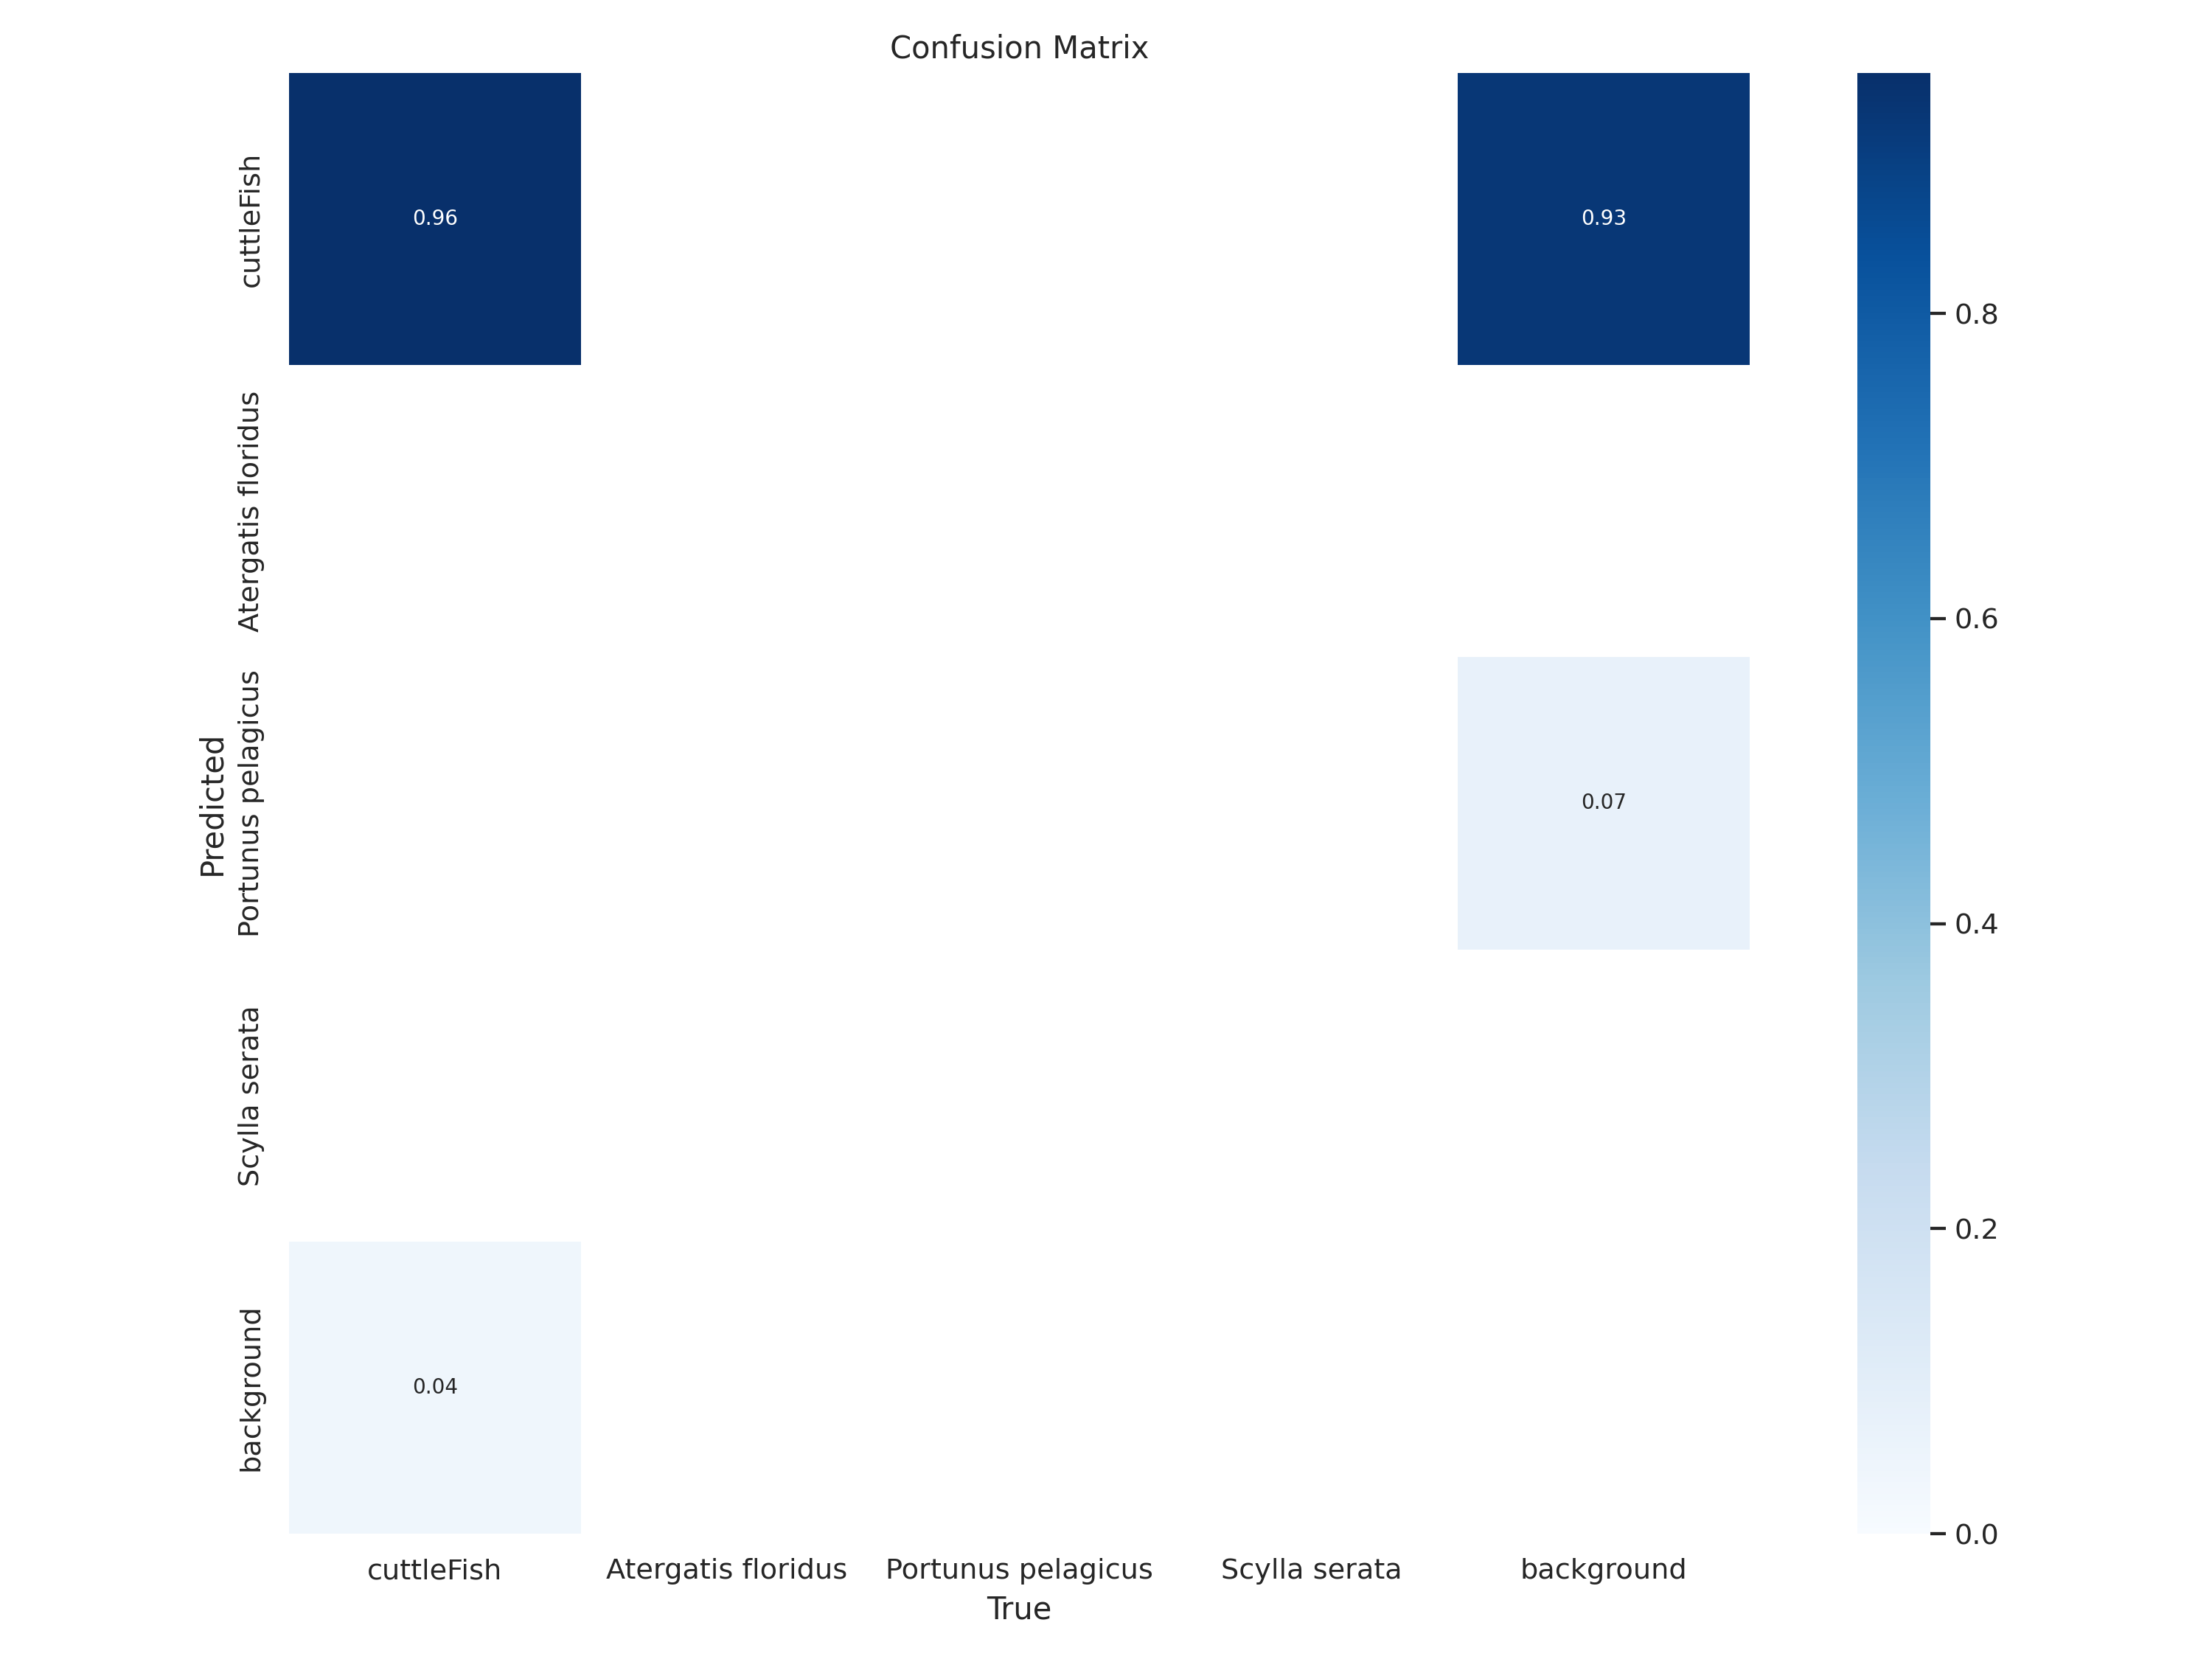

In [13]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


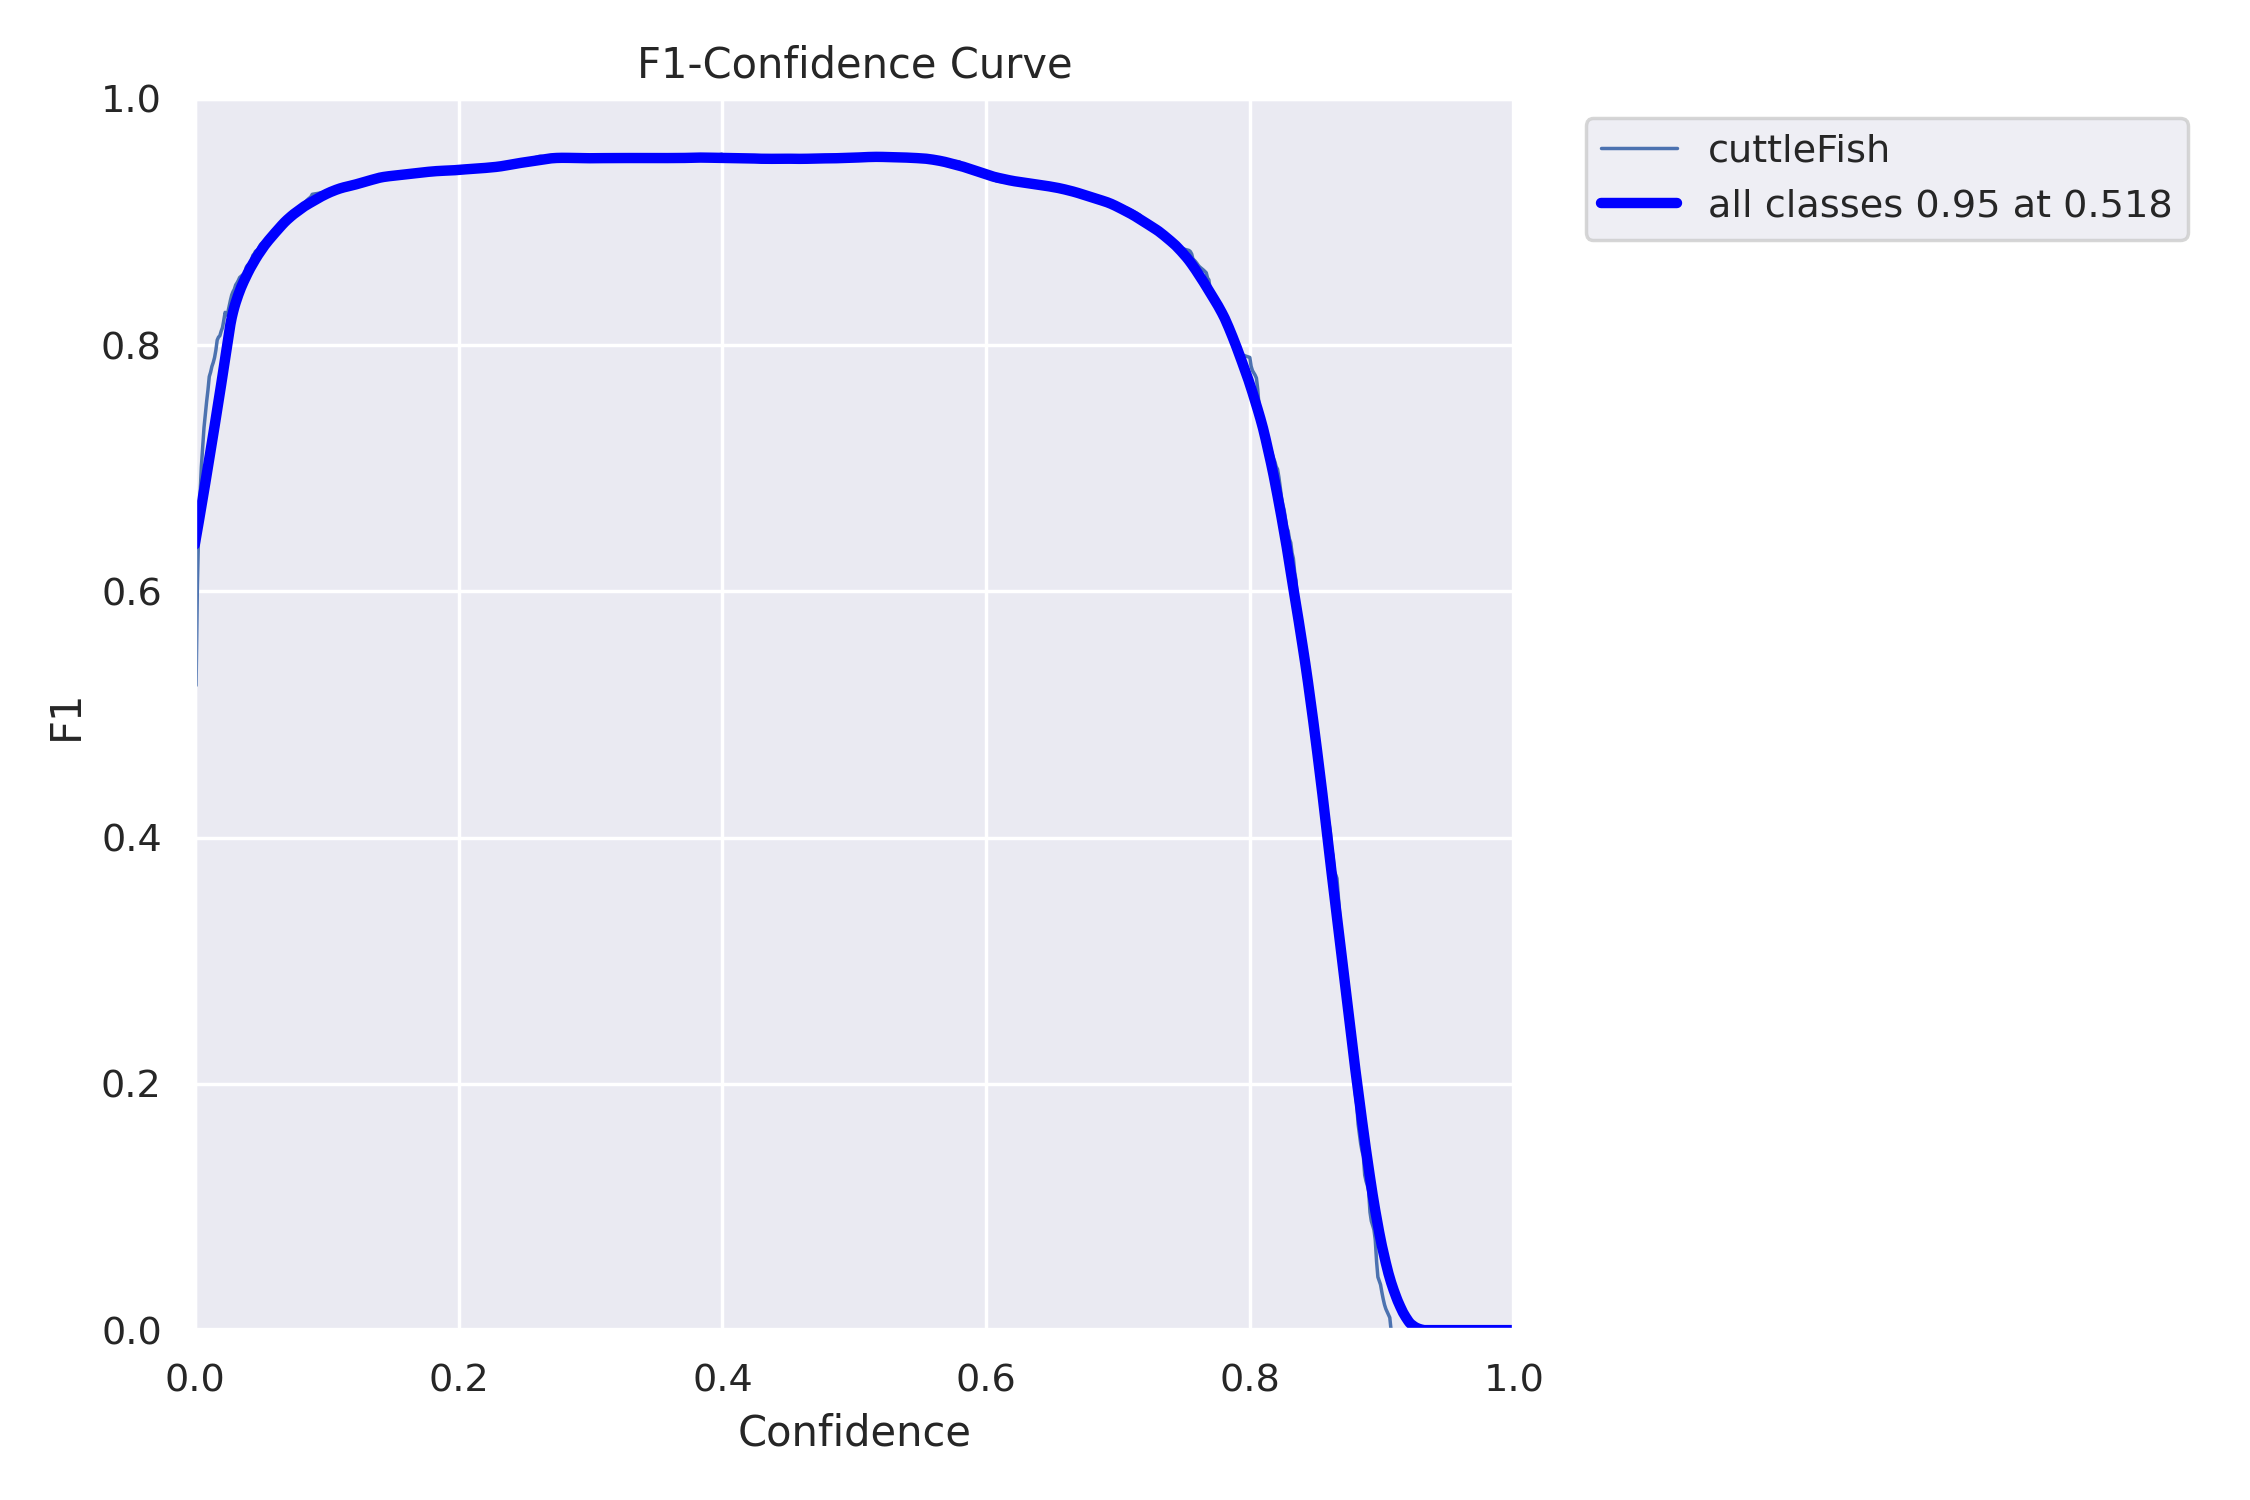

In [15]:

%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train2/F1_curve.png', width=600)

/content


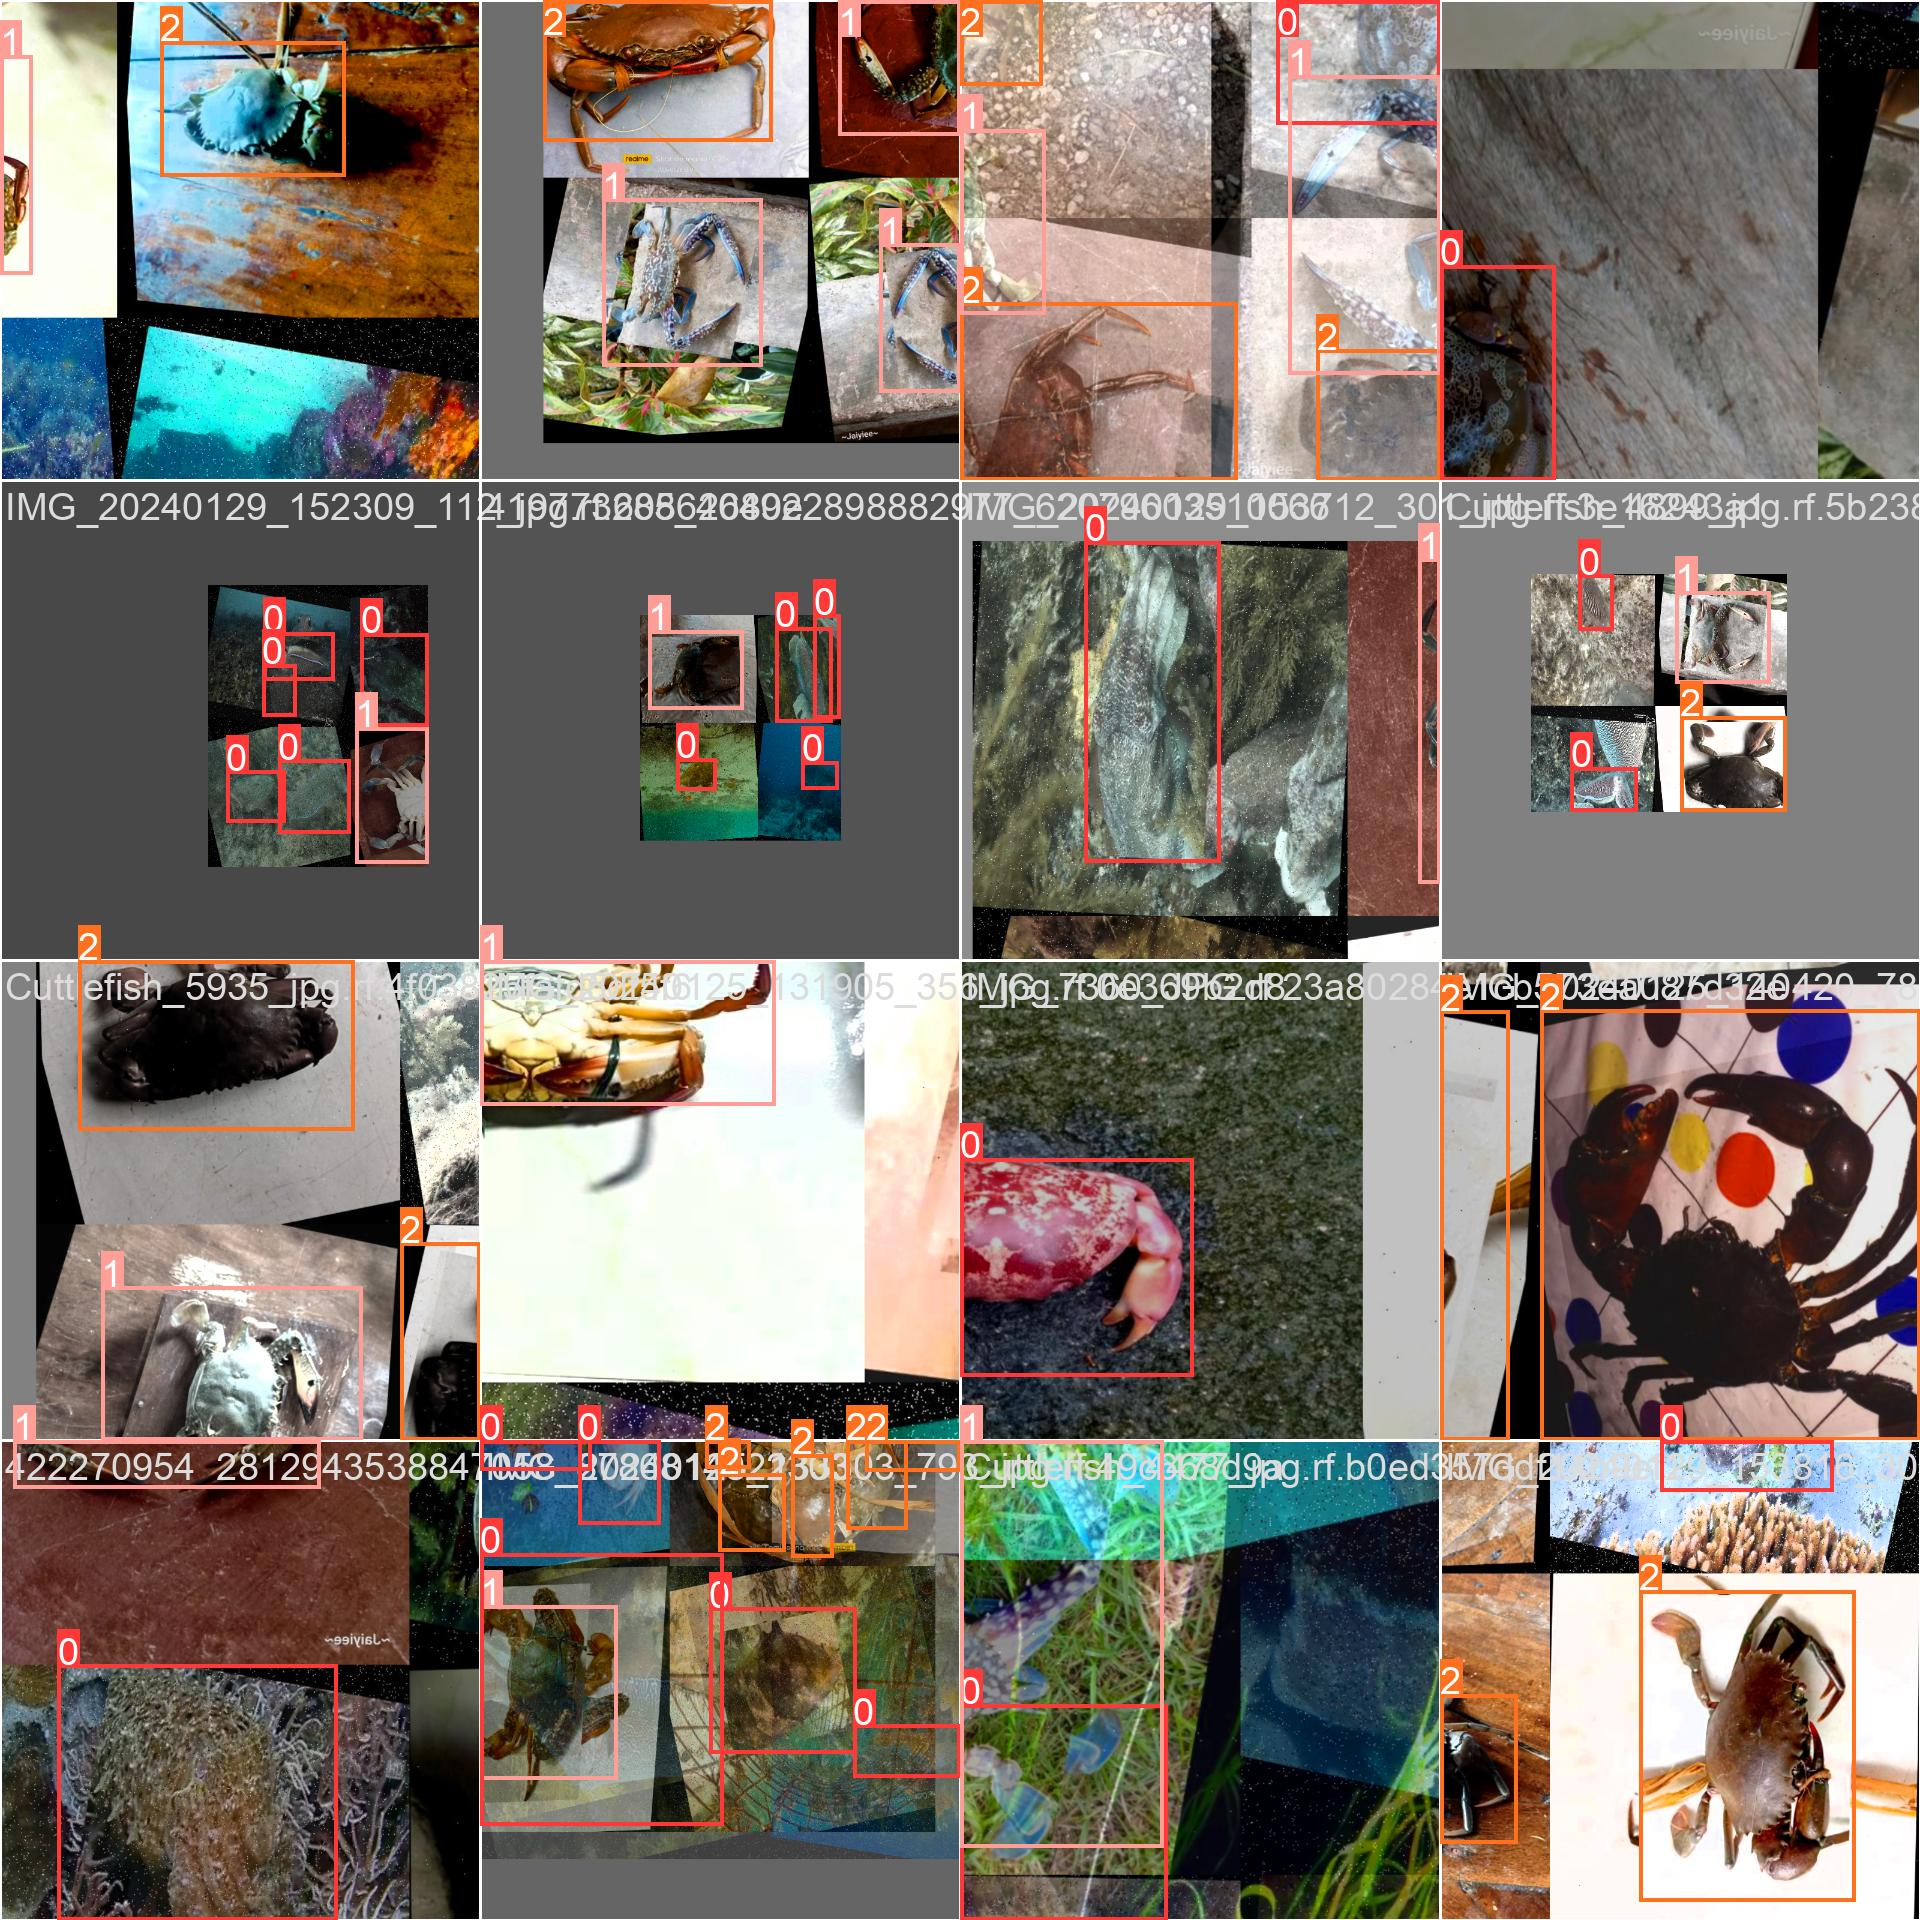

In [16]:
%cd {HOME}

Image(filename='/content/runs/detect/train2/train_batch0.jpg', width=600)

In [17]:
from ultralytics import YOLO

def list_model_classes(model_weights_path):
    model = YOLO(model_weights_path)
    class_names = model.model.names
    print("Available Classes:", class_names)

model = '/content/runs/detect/train2/weights/best.pt'

list_model_classes(model)

Available Classes: {0: 'cuttleFish', 1: 'Atergatis floridus', 2: 'Portunus pelagicus', 3: 'Scylla serata'}


/content


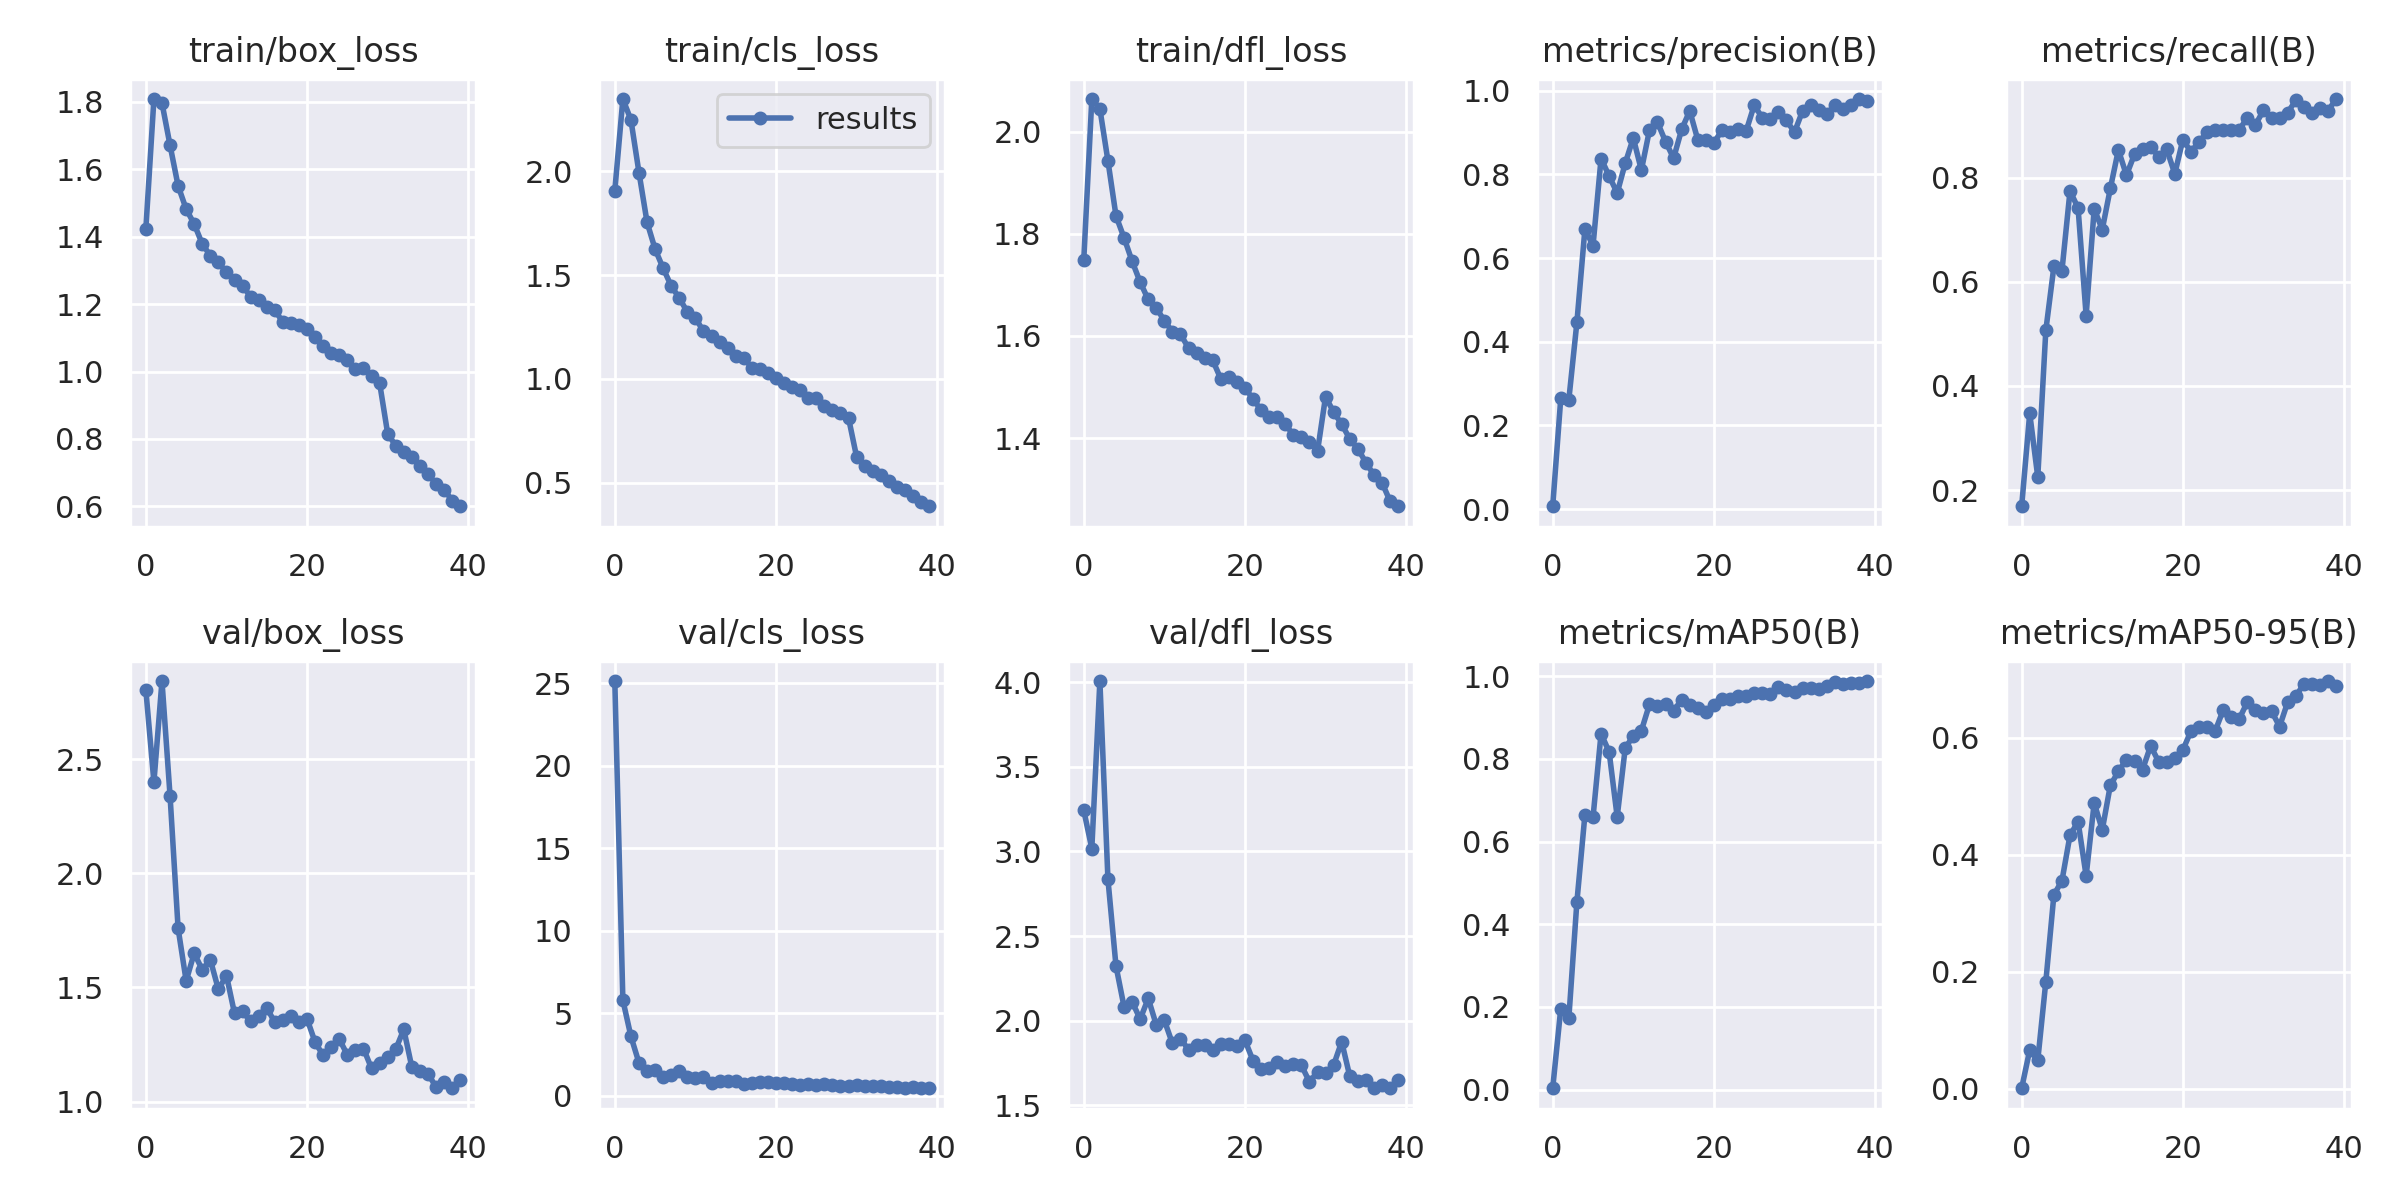

In [18]:
%cd {HOME}

Image(filename='/content/runs/detect/train2/results.png', width=600)

/content


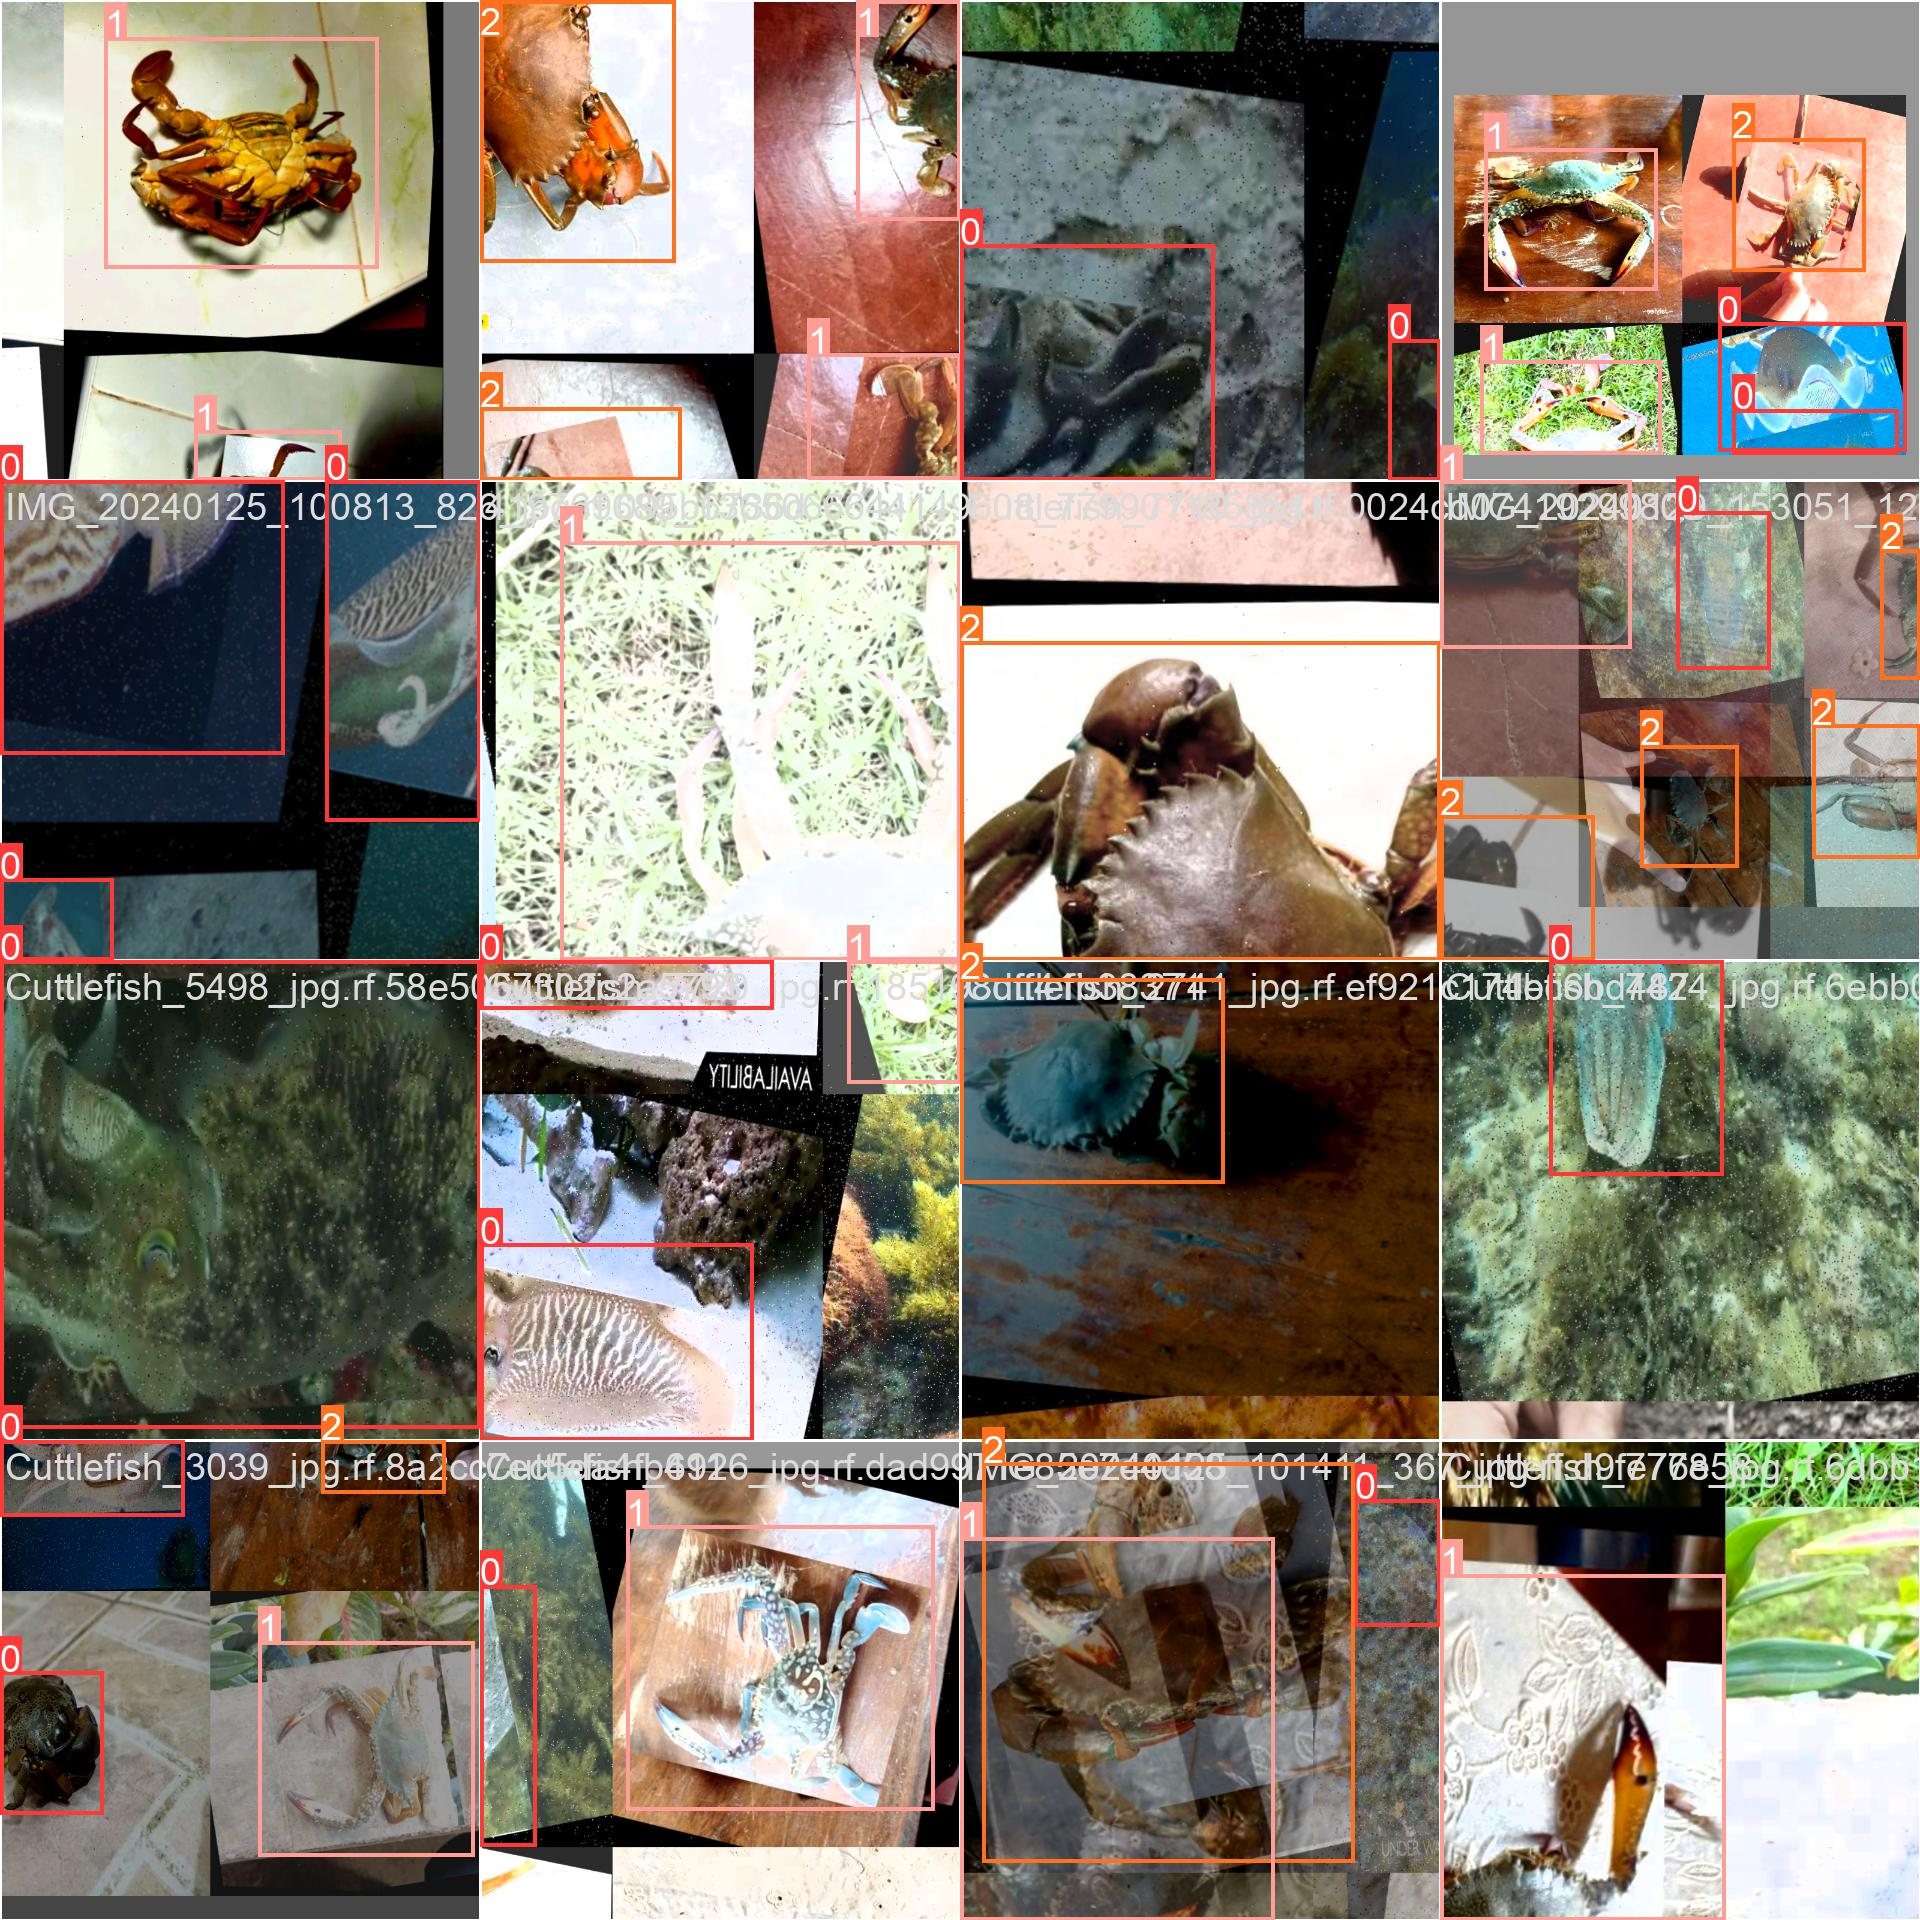

In [19]:
%cd {HOME}

Image(filename='/content/runs/detect/train2/train_batch1.jpg', width=600)

/content


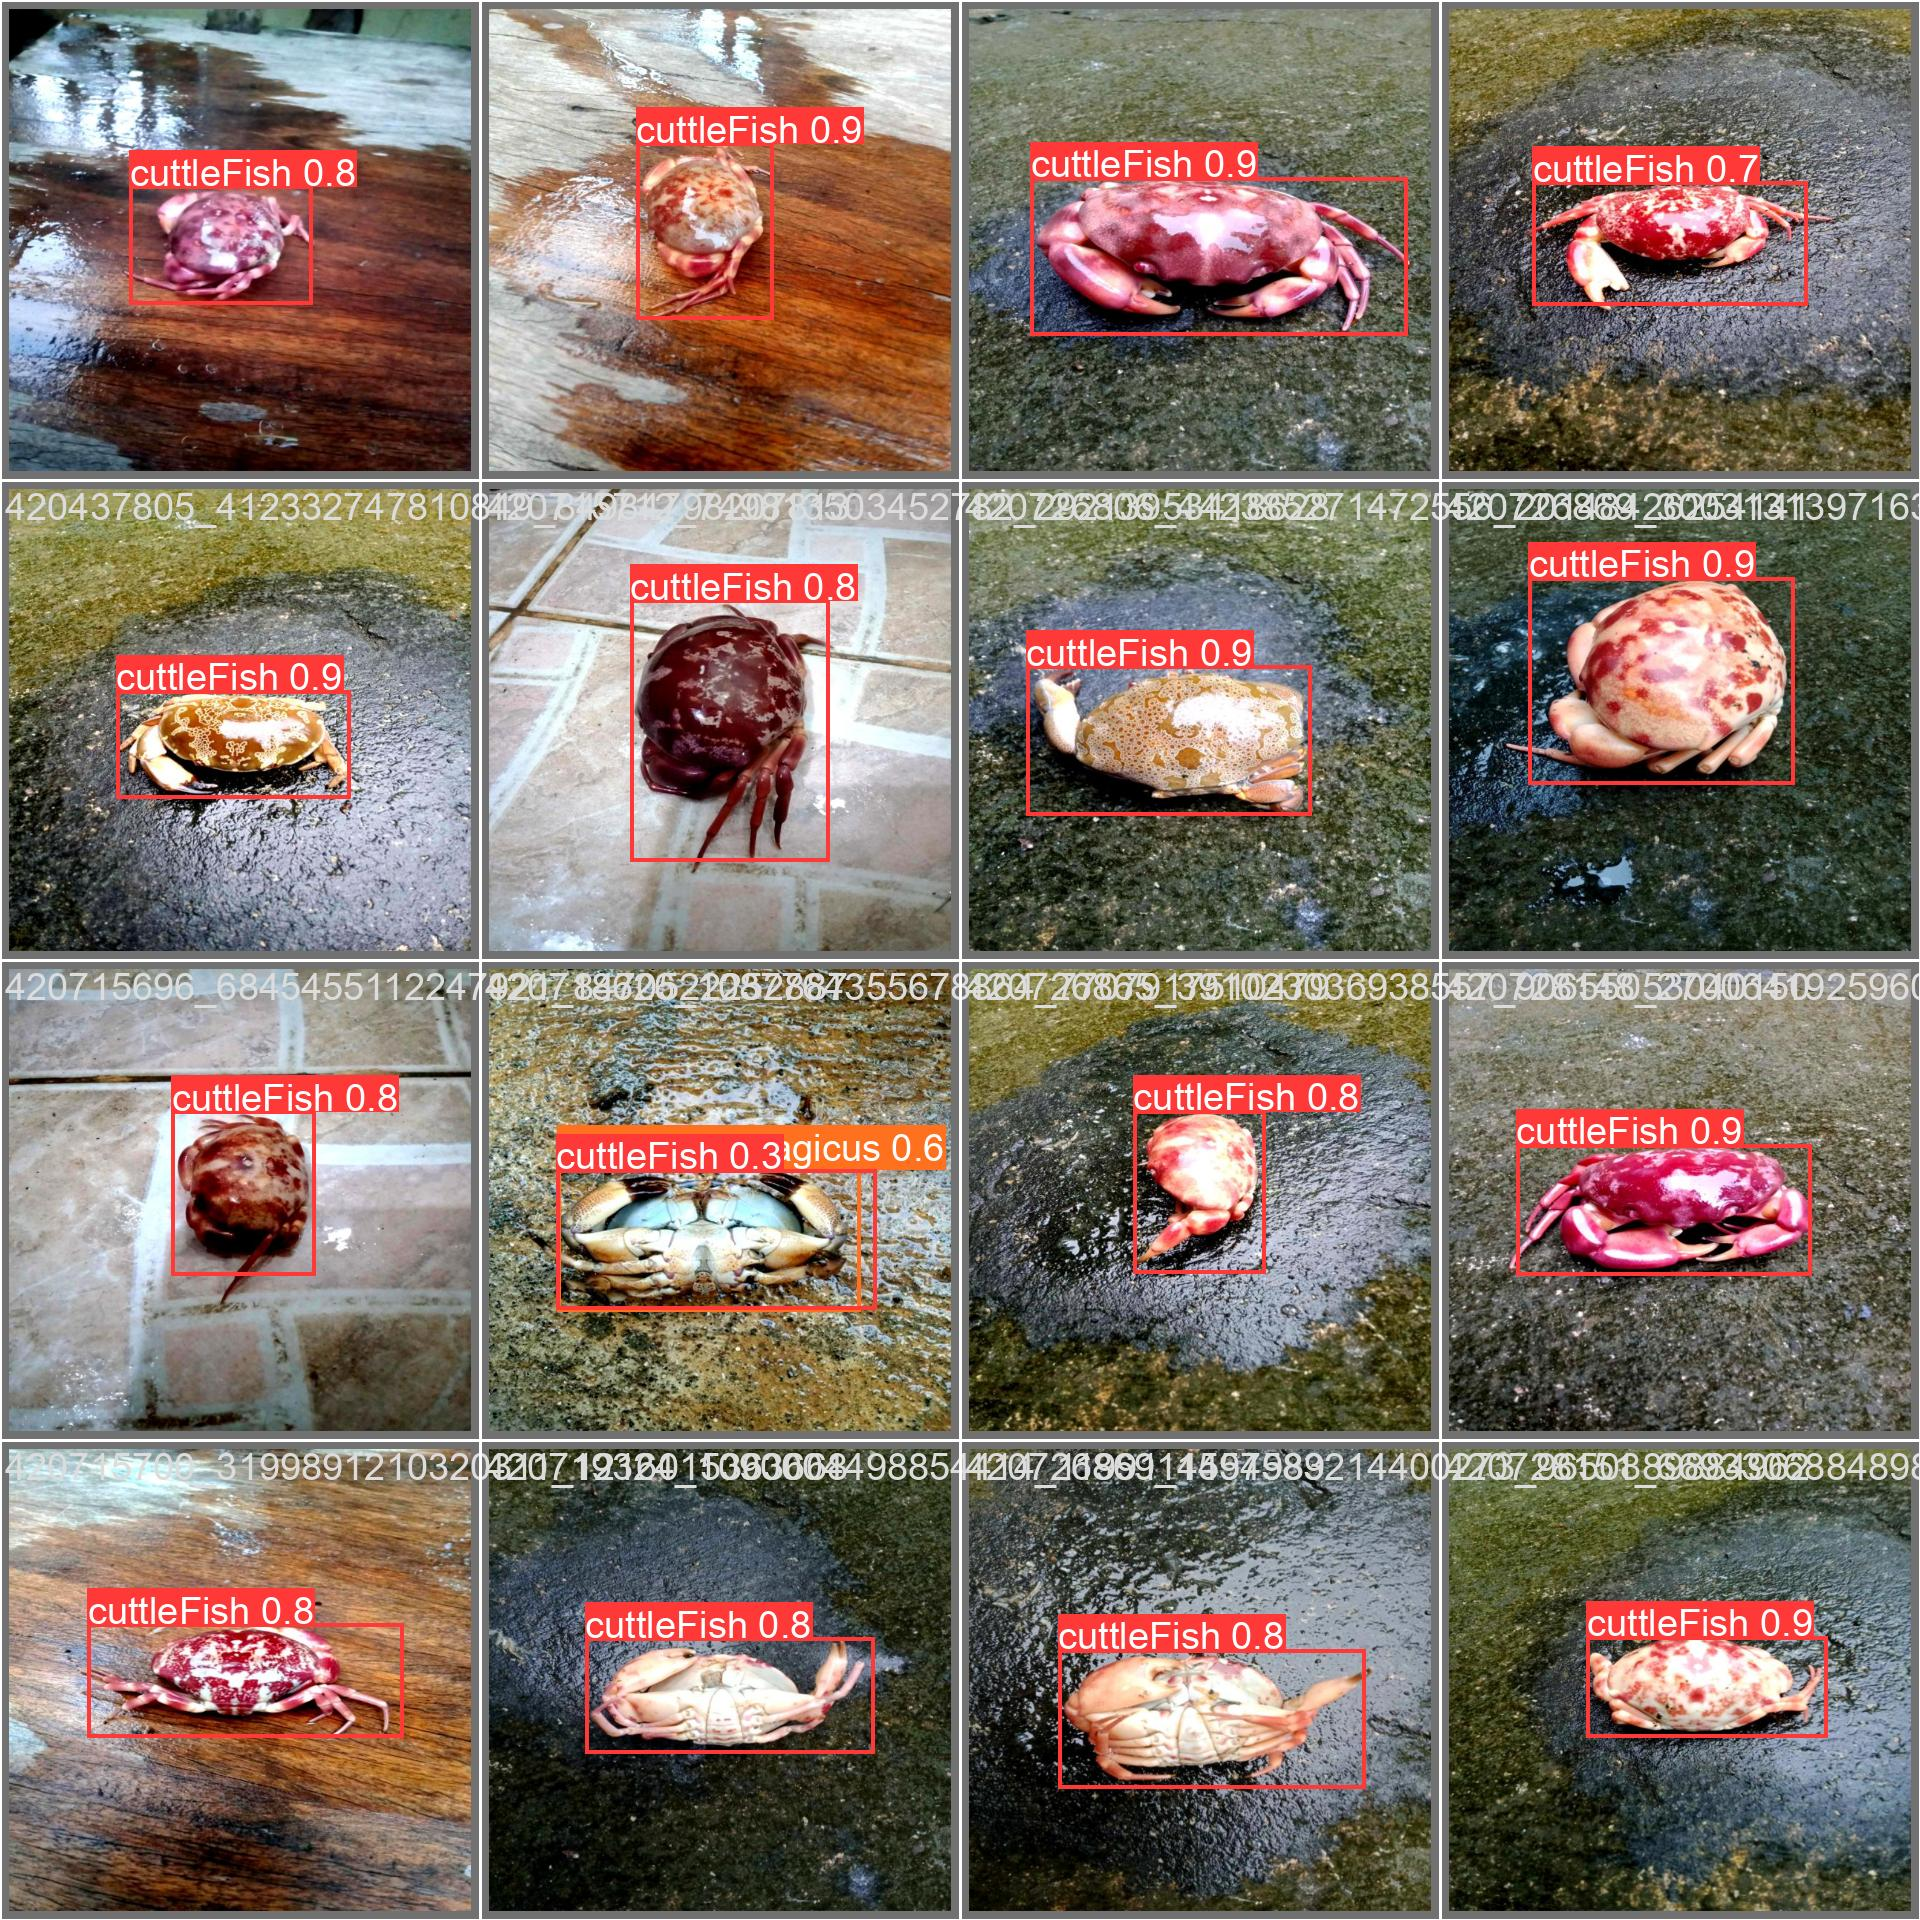

In [20]:
%cd {HOME}

Image(filename='/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

```.yaml``` file for Crab dataset

names:
- Atergatis floridus
- Portunus pelagicus
- Scylla serata
nc: 3
roboflow:
  license: CC BY 4.0
  project: crab-detection-8oljw
  url: https://universe.roboflow.com/jai-wpa2a/crab-detection-8oljw/dataset/9
  version: 9
  workspace: jai-wpa2a
test: ../test/images
train: Crab-Detection-9/train/images
val: Crab-Detection-9/valid/images

---
```.yaml``` file for Cuttlefish dataset

names:
- cuttleFish
nc: 1
roboflow:
  license: CC BY 4.0
  project: cuttle_fish
  url: https://universe.roboflow.com/parvej-hosen/cuttle_fish/dataset/1
  version: 1
  workspace: parvej-hosen
test: ../test/images
train: Cuttle_fish-1/train/images
val: Cuttle_fish-1/valid/images

---

```.yaml``` file for merged dataset

names:
- cuttleFish
- Atergatis floridus
- Portunus pelagicus
- Scylla serata
nc: 4
test: /content/data/test/images
train: /content/data/train/images
val: /content/data/valid/images

---
